In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("clients.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [8]:
data.replace({"Gender":{"Female": 0, "Male": 1}}, inplace=True)

In [9]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    int64  
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.8 KB


## Data Visualisation

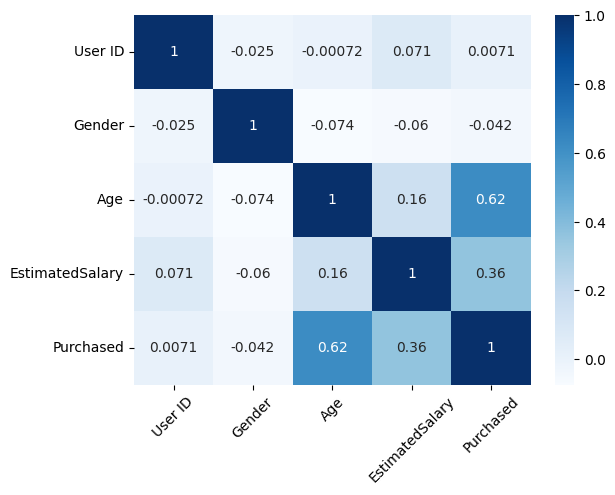

In [10]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.xticks(rotation=45)

plt.show()

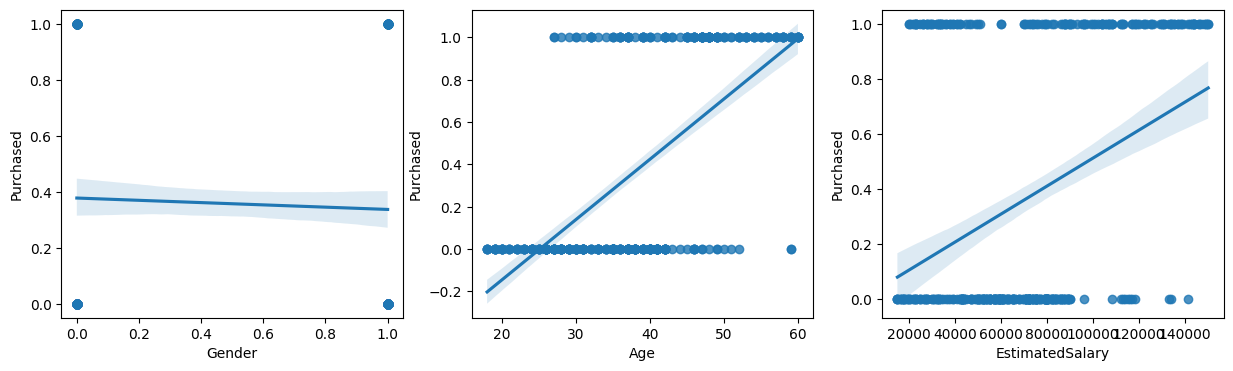

In [24]:
fig, axes = plt.subplots(1, len(data.columns[1:-1]), figsize=(15, 4))

for ax, column in zip(axes, data.columns[1:-1]):
    sns.regplot(x=column, y="Purchased", data=data, ax=ax)


## Modeling

In [33]:
X = data.iloc[:, 1:-1]
y = data['Purchased']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

### Using unormalized data

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.6875


### Using normalized data

In [39]:
stand = StandardScaler()

In [40]:
X_train_stand = stand.fit_transform(X_train)
X_test_stand = stand.transform(X_test)

In [41]:
model_stand = LogisticRegression()
model_stand.fit(X_train_stand, y_train)

LogisticRegression()

In [43]:
y_pred_stand = model_stand.predict(X_test_stand)
print(accuracy_score(y_pred_stand, y_test))

0.8625
